In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def fit_line(x_fit, y_fit):
    x_array = np.array(x_fit)
    y_array = np.array(y_fit)
    a, b = np.polyfit(x_array, y_array, 1)
    return a, b, x_array

In [2]:
model = "WS111-rho0.5"
simfiles_loc = "./simfiles/"
files = os.listdir(simfiles_loc)
runs = ["run-2"]
files

['T1.5',
 'T1.7',
 'T1.9',
 'T2.1',
 'T2.5',
 'T2.9',
 'T3.5',
 'T4.0',
 'T5.0',
 'T6.0']

In [4]:
type = "rdf"
for file in files:
    for run in runs:
        df = pd.DataFrame(np.loadtxt(simfiles_loc + file + "/" + run + "/" + "rdf.dat"))
        plt.plot(df[0], df[1], color = "green")
        plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")
        plt.clf()

<Figure size 640x480 with 0 Axes>

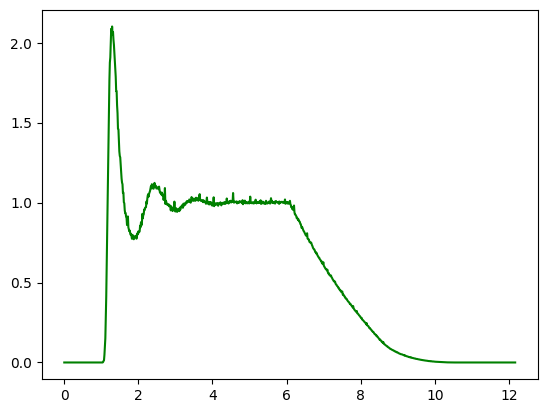

In [15]:
type = "rdf"

df = pd.DataFrame(np.loadtxt('simfiles\T0.2\\rdf.dat'))
plt.plot(df[0], df[1], color = "green")
# plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")
plt.show()

In [6]:
type = "fs" # all temps one plot
for file in files:
    for run in runs:
        df = pd.DataFrame(np.loadtxt(simfiles_loc + file + "/" + run + "/Fs.dat"))
        plt.xscale("log")
    plt.plot(df[0], df[1], label = file)

plt.legend()
plt.title(model)
plt.xlabel("log Time")
plt.ylabel("$F_{(q_{max},t)}$")
plt.savefig("./plots/" + type + "/" + "D1.2_" + type + ".png")
plt.clf()

<Figure size 640x480 with 0 Axes>

In [9]:
type = "fs"
for file in files:
    for run in runs:
        df = pd.DataFrame(np.loadtxt(simfiles_loc + file + "/" + run + "/" + file + "_" + run + "_" + type + ".dat"))
        plt.xscale("log")
        plt.plot(df[0], df[1], label = run)

    plt.legend()
    plt.savefig("./plots/" + type + "/" + file + "_" + type + ".png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [7]:
type = "msd"
results = pd.DataFrame(columns=["temp", "diff_coef"])
for file in files:
    for run in runs:
        if run == "run-2":
            df = pd.DataFrame(np.loadtxt(simfiles_loc + file + "/" + run + "/msd.dat"))
            plt.plot(df[0], df[1])
            a_fit, b_fit, x_fit = fit_line(df[0][22:], df[1][22:]) # fit the line
            temp = float(file[1:])
            results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
            plt.plot(x_fit, a_fit*x_fit+b_fit, color = 'tab:red', linewidth=1) # plot the fitted line
            plt.yscale("log")
            plt.xscale("log")
            plt.savefig("./plots/" + type + "/" + file + "_" + type + "_" + run + ".png")
            plt.clf()

C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\3696105862.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\3696105862.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\3696105862.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\3696105862.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas

<Figure size 640x480 with 0 Axes>

In [8]:
type = "msd" # all temp one plot
results = pd.DataFrame(columns=["temp", "diff_coef"])
for file in files:
    for run in runs:
        if run == "run-2":
            df = pd.DataFrame(np.loadtxt(simfiles_loc + file + "/" + run + "/msd.dat"))
            plt.plot(df[0], df[1])
            a_fit, b_fit, x_fit = fit_line(df[0][22:], df[1][22:]) # fit the line
            temp = float(file[1:])
            results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
            plt.plot(x_fit, a_fit*x_fit+b_fit, color = 'tab:red', linewidth=1) # plot the fitted line
plt.yscale("log")
plt.xscale("log")
plt.title(model)
plt.xlabel("Time")
plt.ylabel("$r^2$")
plt.savefig("./plots/" + type + "/alltemp_" + type + ".png")
plt.clf()

C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\2885771838.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\2885771838.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\2885771838.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"temp" : temp, "diff_coef": a_fit}, ignore_index=True)
C:\Users\mearo\AppData\Local\Temp\ipykernel_4020\2885771838.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas

<Figure size 640x480 with 0 Axes>

In [9]:
results['1/temp'] = 1/results['temp']

<AxesSubplot: xlabel='1/temp'>

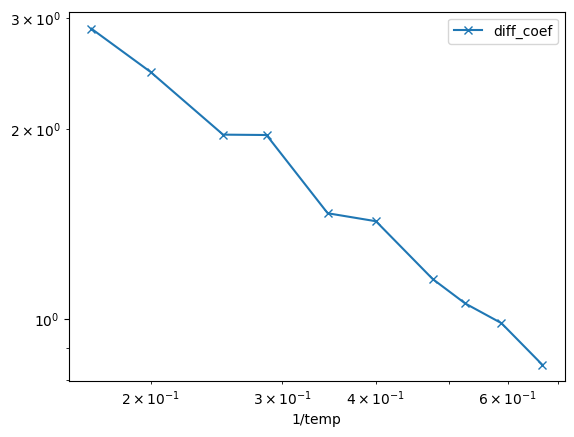

In [10]:

results.plot('1/temp', 'diff_coef', logx=True, logy = True, marker = 'x')S

In [11]:
Kb = 1.0
rho = 1.2
reduced_diff = []

# diffcoef*rho^1/3(1/kb*t)^1/2

results["red_diff"] = results['diff_coef']*(rho**(1/3))*(((1/(Kb*results['temp']))**(1/2)))

In [12]:
#SINCE NO T0.5 Sex drop that temperature
results_no05 = results.drop([0])

exentrfile = pd.DataFrame(np.loadtxt("free_energy_rho_1.200000.dat"))

exentr = []
for temp in results_no05['temp']:
    exentr.append(exentrfile.loc[exentrfile[0] == temp][5].values[0])
results_no05['Sex'] = exentr

FileNotFoundError: free_energy_rho_1.200000.dat not found.

In [169]:
results_no05

,temp,diff_coef,1/temp,red_diff,Sex
1,0.6,0.023678,1.666667,0.032483,-4.874379
2,0.7,0.040601,1.428571,0.051568,-4.620547
3,0.8,0.061068,1.250000,0.072554,-4.409723
4,0.9,0.082310,1.111111,0.092198,-4.231697
5,1.0,0.105787,1.000000,0.112416,-4.079932
6,1.2,0.154331,0.833333,0.149712,-3.829079
7,1.5,0.234480,0.666667,0.203448,-3.544684
8,1.8,0.310039,0.555556,0.245569,-3.328247
9,2.3,0.441245,0.434783,0.309179,-3.060277
10,2.8,0.588739,0.357143,0.373884,-2.861703


In [170]:
results_no05.to_csv(model + "_results.csv")